### CSE-221710313027-KUNDLA NAVEEN

### Finding Donors

we will use a number of different supervised algorithms to precisely predict individuals’ salary  using data collected

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import visuals as vs
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV

### Data Loading

In [2]:
data = pd.read_csv ("donars.csv")
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.isnull()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Exploratory Data Analysis: 

In [4]:
list(data.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'salary']

In [5]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

### Total no of records

In [8]:
n_of_records = len(data)
n_of_records

32561

In [9]:
df = data.groupby(['salary']).salary.count()


In [10]:
df


salary
 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [11]:
##Income of people greater than 50K
n_greater_50k = df[1]
n_greater_50k

7841

In [12]:
##Income of people atmost 50k
n_at_most_50k = df[0]
n_at_most_50k

24720

In [13]:
greater_percent = (n_greater_50k / n_of_records) * 100
greater_percent

24.080955744602438

C:\Users\home\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


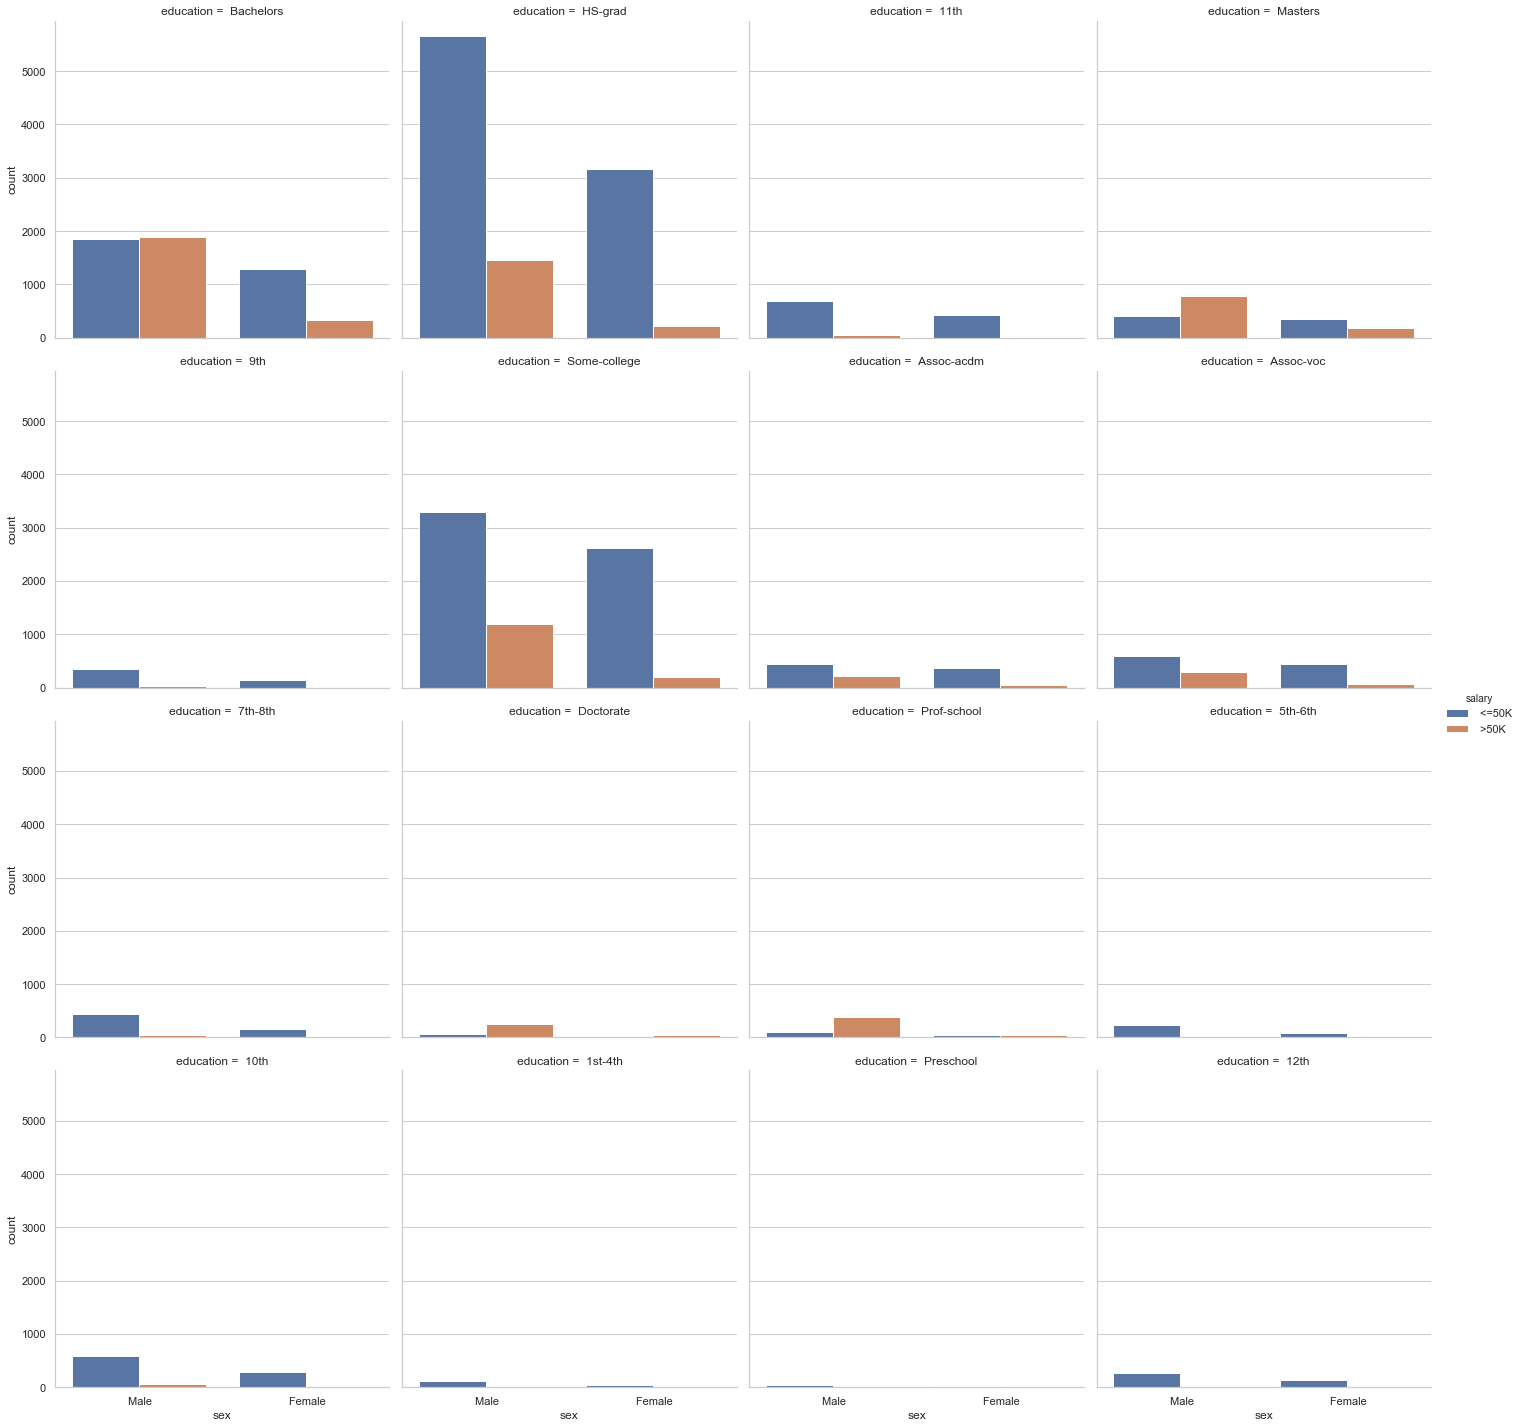

In [14]:
sns.set(style="whitegrid", color_codes=True)
sns.factorplot("sex", col='education', data=data, hue='salary', kind="count", col_wrap=4);


C:\Users\home\Desktop\kp\visuals.py:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


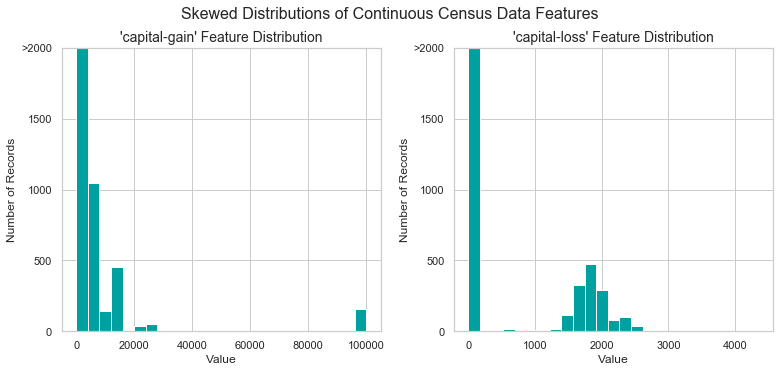

In [15]:
income_raw = data['salary']
features_raw = data.drop('salary', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)


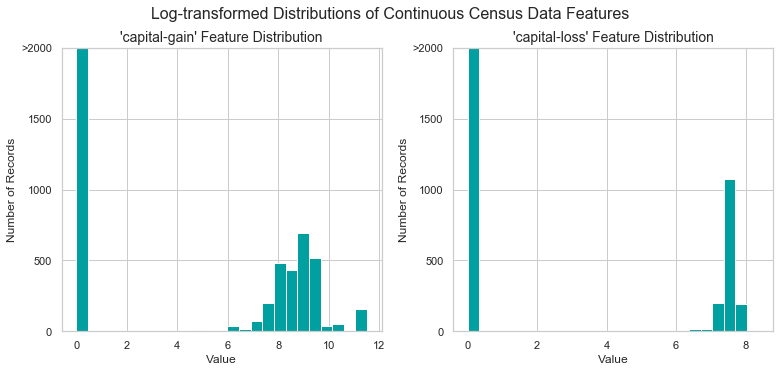

In [16]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1)) #add 1

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)


### Scaling

Normalizing Numerical Features:


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(5))


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,77516,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,83311,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,215646,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,234721,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,338409,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba


### ONEHOTENCODER

In [18]:
#Creating dummies
features = pd.get_dummies(features_raw)


from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
data['salary'] = labelencoder.fit_transform(data['salary'])
labelencoder = LabelEncoder()
data['sex'] = labelencoder.fit_transform(data['sex'])
labelencoder = LabelEncoder()
data['race'] = labelencoder.fit_transform(data['race'])

data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,4,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,4,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,4,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,2,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,2,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,4,0,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,4,1,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,4,0,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,4,1,0,0,20,United-States,0


### train_test_split

In [19]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    income_raw,
                                                    test_size = 0.2,
                                                    random_state = 0)

# Showing the results of the split
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

26048
6513
26048
6513


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vectorizer = CountVectorizer()

In [22]:
vectorizer.fit(data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [23]:
vector = vectorizer.transform(data)

In [24]:
vector.shape

(15, 20)

In [25]:
vector.toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,4,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,4,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,4,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,2,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,2,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,4,0,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,4,1,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,4,0,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,4,1,0,0,20,United-States,0


### Random Forest Classifier

In [27]:
#import,inttialize and fit
#import the RFC From sklearn
from sklearn.ensemble import RandomForestClassifier

#intialize the object for RFC
rfc = RandomForestClassifier(n_estimators = 40)

#fit RFC to the dataset
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
#predict on training data
#syntax:objectname.predict(Inputvalues)
y_pred_train = rfc.predict(X_train)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     19802
        >50K       1.00      1.00      1.00      6246

    accuracy                           1.00     26048
   macro avg       1.00      1.00      1.00     26048
weighted avg       1.00      1.00      1.00     26048



In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred_train)

0.9991937960687961

In [30]:
#predicition on test data(unseen data)
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4918
        >50K       0.73      0.61      0.66      1595

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [31]:
accuracy_score(y_test,y_pred_test)

0.8483033932135728

In [32]:
rfc_score = accuracy_score(y_test,y_pred_test)*100

In [33]:
rfc_score

84.83033932135729

In [34]:
#crossvalidationscore
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc,X_train,y_train,cv=5)
np.mean(scores)

0.8562651457005058

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()

In [36]:
logr.fit(X_train,y_train) #train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_train_pred=logr.predict(X_train)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_train,y_train_pred)


array([[19802,     0],
       [ 6246,     0]], dtype=int64)

In [39]:
print(classification_report(y_train,y_train_pred))

C:\Users\home\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86     19802
        >50K       0.00      0.00      0.00      6246

    accuracy                           0.76     26048
   macro avg       0.38      0.50      0.43     26048
weighted avg       0.58      0.76      0.66     26048



In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7602119164619164

In [41]:
logr.fit(X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_test_pred = logr.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_test_pred)


array([[4918,    0],
       [1595,    0]], dtype=int64)

In [44]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      4918
        >50K       0.00      0.00      0.00      1595

    accuracy                           0.76      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.57      0.76      0.65      6513



C:\Users\home\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.7551051742668509

In [46]:
logr_score = accuracy_score(y_test,y_test_pred)*100

In [47]:
logr_score

75.51051742668508

### Naive Bayes 

In [48]:
# Apply the naive Bayes Algorithm
# Import BernNB
from sklearn.naive_bayes import BernoulliNB
# creating an object for BerNB
model_BernNB = BernoulliNB()

In [49]:
# Applying the algorithm to the data
# objectName.fit(Input,Output)
model_BernNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [50]:
y_train_pred = model_BernNB.predict(X_train)

In [51]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_train,y_train_pred)

array([[14826,  4976],
       [ 1297,  4949]], dtype=int64)

In [52]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.75      0.83     19802
        >50K       0.50      0.79      0.61      6246

    accuracy                           0.76     26048
   macro avg       0.71      0.77      0.72     26048
weighted avg       0.82      0.76      0.77     26048



In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7591753685503686

In [54]:
# Applying the algorithm to the data
# objectName.fit(Input,Output)
model_BernNB.fit(X_test, y_test)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [55]:
y_test_pred = model_BernNB.predict(X_test)

In [56]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_test_pred)

array([[3692, 1226],
       [ 350, 1245]], dtype=int64)

In [57]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

       <=50K       0.91      0.75      0.82      4918
        >50K       0.50      0.78      0.61      1595

    accuracy                           0.76      6513
   macro avg       0.71      0.77      0.72      6513
weighted avg       0.81      0.76      0.77      6513



In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.7580224167050514

In [59]:
model_BernNB_score = accuracy_score(y_test,y_test_pred)*100

In [60]:
model_BernNB_score

75.80224167050514

Text(0, 0.5, 'Accuracy')

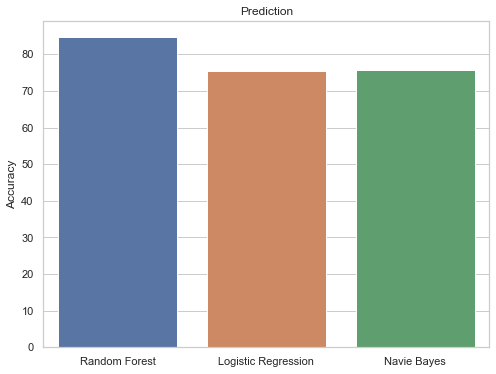

In [61]:
# comparing scores
Methods = ['Random Forest','Logistic Regression','Navie Bayes']
scores = np.array([rfc_score, logr_score, model_BernNB_score])
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods,scores)
plt.title('Prediction')
plt.ylabel('Accuracy')

### Hyperparameter tuning

In [62]:
param_grid = {"n_estimators": [10, 18, 22],
              "max_depth": [3, 5],
              "min_samples_split": [15, 20],
              "min_samples_leaf": [5, 10, 20],
              "max_leaf_nodes": [20, 40],
              "min_weight_fraction_leaf": [0.1]}


In [63]:
#Import the GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rfc, param_grid=param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=40, n_jobs=None,
                                              oob_score=False,
                                              ran

In [64]:
grid_search.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 40,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.1,
 'n_estimators': 10}

In [65]:
rfc = RandomForestClassifier(max_depth= 3,
 max_leaf_nodes=20,
 min_samples_leaf=5,
 min_samples_split=15,
 min_weight_fraction_leaf= 0.1,
 n_estimators=10)

In [66]:
# We need to fit the model to the data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.1, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
# Prediction on test data
pred_test = rfc.predict(X_test)

In [68]:
#Classification Report of actual values and predicted value(GridSearch)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      4918
        >50K       0.00      0.00      0.00      1595

    accuracy                           0.76      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.57      0.76      0.65      6513



C:\Users\home\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
rfc_score=(rfc.score(X_test, pred_test))*100
rfc_score

100.0

Text(0, 0.5, 'Accuracy')

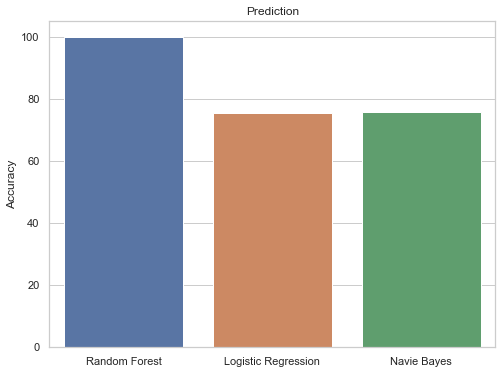

In [70]:
# comparing scores
Methods = ['Random Forest','Logistic Regression','Navie Bayes']
scores = np.array([rfc_score, logr_score, model_BernNB_score])
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods,scores)
plt.title('Prediction')
plt.ylabel('Accuracy')